# Packages

In [1]:
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
import seaborn as sns

# Importing Data

In [2]:
print(os.listdir())

['application_test.csv', '.DS_Store', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'Home Credit Risk - Kaggle.ipynb', '.ipynb_checkpoints', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
app_train = pd.read_csv('/Users/hemanthnirujogi/Documents/Courses/Machine Learning/Kaggle-Home Credit/application_train.csv')
print('The shape of the training data:{}'.format(app_train.shape))

#Snippet of the data
# app_train.dtypes.value_counts()
app_train.head()

The shape of the training data:(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_test = pd.read_csv('/Users/hemanthnirujogi/Documents/Courses/Machine Learning/Kaggle-Home Credit/application_test.csv')
print('The shape of the test data:{}'.format(app_test.shape))

#Snippet of the data
#app_test.dtypes.value_counts()
app_test.head()

The shape of the test data:(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [6]:
app_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

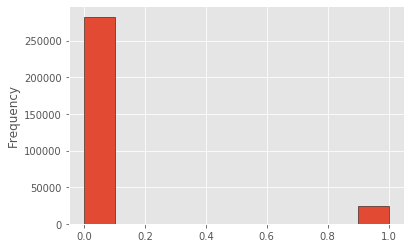

In [7]:
#Distribution of Target variable
app_train['TARGET'].astype(int).plot.hist(edgecolor='black')

## Calculate the missing values

In [8]:
def calc_missing_values(df):
    mv = df.isnull().sum()
    mv_percent = 100*df.isnull().sum() / len(df)
    mv_df = pd.concat([mv, mv_percent], axis=1)
    mv_df.columns = ['Total_MV per Col', 'Missing Percent']
    mv_df = mv_df.sort_values('Missing Percent', ascending = False).round(1)
    
    print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mv_df.shape[0]) +
              " columns that have missing values.")
    return mv_df

In [9]:
missing_values = calc_missing_values(app_train)
missing_values.head(10)

The dataframe has 122 columns.
There are 122 columns that have missing values.


,Total_MV per Col,Missing Percent
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [10]:
#Number of unique classes in each of the columns
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding Categorical Variables

In [10]:
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
           le.fit(app_train[col])
           app_train[col]=le.transform(app_train[col])
           app_test[col]=le.transform(app_test[col])
           
           le_count+=1
        
print('%d columns are label encoded' % le_count)

3 columns are label encoded


In [11]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print(app_train.shape)
print(app_test.shape)

(307511, 243)
(48744, 239)


In [12]:
train_labels = app_train['TARGET']

app_train, app_test = app_train.align(app_test, join='inner', axis=1)
app_train['TARGET']=train_labels

print(app_train.shape)
print(app_test.shape)

app_train.head()

(307511, 240)
(48744, 239)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


## Detecting Anomolies 

In [13]:
(app_train['DAYS_BIRTH']/ -365).describe().round(1)

count    307511.0
mean         43.9
std          12.0
min          20.5
25%          34.0
50%          43.2
75%          53.9
max          69.1
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


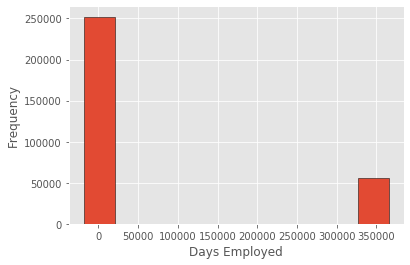

In [14]:
# print(app_train['DAYS_EMPLOYED'])
print((app_train['DAYS_EMPLOYED']).describe())
app_train['DAYS_EMPLOYED'].plot.hist(edgecolor='black')
plt.xlabel('Days Employed');

In [15]:
anomolies=app_train[app_train['DAYS_EMPLOYED']==365243]
# anomolies.shape
not_anomolies = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * not_anomolies['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomolies['TARGET'].mean()))
print('There are %d anomolous days of employment' % len(anomolies))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomolous days of employment


count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64


Text(0.5, 0, 'Days Employed')

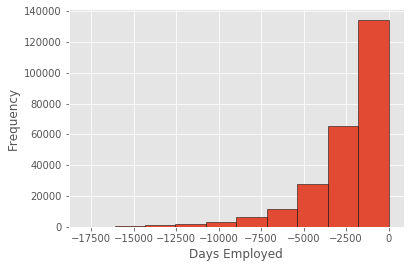

In [16]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED']==365243

#replacing the "365243" with nan value
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print((app_train['DAYS_EMPLOYED']).describe())
#ploting the 'DAYS_EMPLOYED' after replacing anomolies with nan
app_train['DAYS_EMPLOYED'].plot.hist(edgecolor = 'black')
plt.xlabel('Days Employed')

In [17]:
#Applying the same for test data
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED']==365243

#replacing the "365243" with nan value
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('{} anomalies are found in the test data out of {} entries'.format( (app_test["DAYS_EMPLOYED_ANOM"].sum()), len(app_test)))

9274 anomalies are found in the test data out of 48744 entries


## Effect of age on repayment

In [18]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

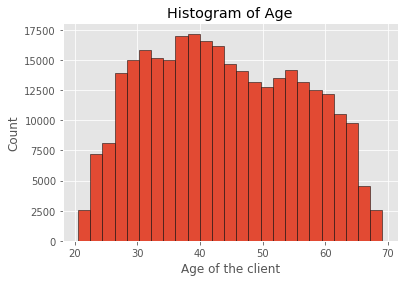

In [19]:
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'black', bins = 25)
plt.title('Histogram of Age'); 
plt.xlabel('Age of the client'); 
plt.ylabel('Count');

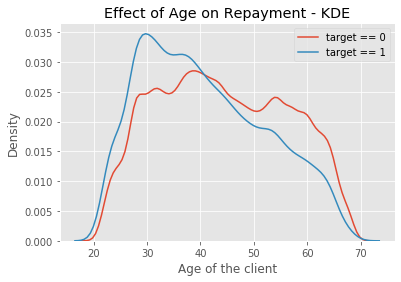

In [20]:
# Loans which were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# Loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age of the client'); plt.ylabel('Density'); plt.title('Effect of Age on Repayment - KDE');

## Finding Correlations

In [21]:
correlations = app_train.corr()['TARGET'].sort_values()

print("\n Positively Correlated:\n ", correlations.tail(10))
print("Negatively Correlated:\n ", correlations.head(10))


 Positively Correlated:
  NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
TARGET                                               1.000000
Name: TARGET, dtype: float64
Negatively Correlated:
  EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_BIRTH                             -0.078239
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_